In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [2]:
path = 'Data/'

os.listdir(path)

['test.csv',
 'train.csv',
 'transactions.csv',
 'oil.csv',
 'holidays_events.csv',
 'sample_submission.csv',
 'stores.csv']

[from kaggle](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data?select=stores.csv)

# train.csv

In [3]:
train = pd.read_csv(path + 'train.csv')
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
train['year'] = train.date.dt.year
print(train.shape)
train.head()

(3000888, 7)


,id,date,store_nbr,family,sales,onpromotion,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013
4,4,2013-01-01,1,BOOKS,0.0,0,2013


In [4]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
year           0
dtype: int64

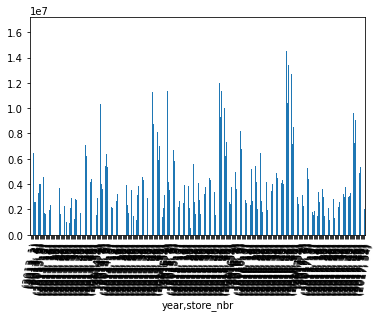

In [12]:
plt.xticks(rotation=80)
train.groupby(['year', 'store_nbr']).sales.sum().plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

In [ ]:
print(f'{len(train.family.unique())} family types')

In [ ]:
# 不同店，一直以來的銷售總額

plt.figure(figsize=(12, 5))
train.groupby(['store_nbr'])['sales'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('avg sales')
plt.show()

In [ ]:
# 不同店，在不同年份中的銷售總額

for store_num in range(1, 55):
    d_ = train[train['store_nbr'] == store_num]
    plt.figure(figsize=(12, 5))
    d_.groupby(['year'])['sales'].sum().plot(kind='bar')
    plt.xticks(rotation=0)
    plt.ylabel('total sales')
    plt.xlabel(f'year in store {store_num}')
    plt.show()
    break

In [ ]:
for store_num in range(1, 55):
    d_ = train[train['store_nbr'] == store_num]
    plt.figure(figsize=(12, 5))
    d_.groupby(['family'])['sales'].sum().plot(kind='bar')
    plt.xticks(rotation=80)
    plt.ylabel('total sales')
    plt.xlabel(f'in store {store_num}')
    plt.show()
    break

In [ ]:
# 不同 family 種類的整體平均銷售情況，對個別店來說也有大致相同的情況
train.groupby(['family']).sales.mean().plot(kind='bar')

In [ ]:
# 幾乎每一間店的 sales 都與 onpromotion 有正相關

for nbr in range(1, 55):
    d_ = train[[col for col in train.columns if col not in ('id')]]
    d_ = d_[d_['store_nbr'] == nbr]
    d_ = d_[['sales', 'onpromotion', 'year']]
    sns.heatmap(d_.corr(), annot=True)
    plt.xlabel(f'store: {nbr}')
    plt.show()
    break

In [ ]:
train.groupby(['year', 'family']).sales.sum()

In [ ]:
#
px.line(train.groupby(['year', 'store_nbr']).sales.sum().reset_index(), 
        x = "year", y = "sales", color = "store_nbr")

In [ ]:
#
px.line(train.groupby(['family', 'store_nbr']).sales.sum().reset_index(), 
        x = "family", y = "sales", color = "store_nbr")

In [ ]:
train.groupby(['year', 'family']).sales.sum()

In [ ]:
px.line(train.groupby(['year', 'family']).sales.sum().reset_index(), 
        x = "year", y = "sales", color = "family")

# stores.csv

In [ ]:
stores = pd.read_csv(path + 'stores.csv')
print(stores.shape)
stores.head()

In [ ]:
stores.isna().sum()

In [ ]:
print(f'got {len(stores.store_nbr)} different stores')
print(f'got {len(stores.city.unique())} different cities')
print(f'got {len(stores.state.unique())} different states')
print(f'got {len(stores.type.unique())} different type type')
print(f'got {len(stores.cluster.unique())} different clusters type')

In [ ]:
sns.countplot(data=stores, x='city')
plt.xticks(rotation=80)
plt.show()
sns.countplot(data=stores, x='state')
plt.xticks(rotation=80)
plt.show()
sns.countplot(data=stores, x='type')
plt.show()
sns.countplot(data=stores, x='cluster')
plt.show()

# train & store

In [ ]:
train = pd.read_csv(path + 'train.csv')
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
stores = pd.read_csv(path + 'stores.csv')

In [ ]:
ts = pd.merge(train, stores)
ts.tail(3)

In [ ]:
# 不同city，在各個年份中銷售總額
ts["store_nbr"] = ts["store_nbr"].astype("int8")
ts["year"] = ts.date.dt.year
px.line(ts.groupby(["city", "year"]).sales.sum().reset_index(), 
        x = "year", y = "sales", color = "city")

In [ ]:
# 不同city，在各個年份中銷售平均
px.line(ts.groupby(["city", "year"]).sales.mean().reset_index(), 
        x = "year", y = "sales", color = "city")

In [ ]:
px.line(ts.groupby(["family", "city"]).sales.mean().reset_index(), 
        x = "family", y = "sales", color = "city")

In [ ]:
ts.head(1)

In [ ]:
px.line(ts.groupby(["year", "state"]).sales.sum().reset_index(), 
        x = "year", y = "sales", color = "state")

In [ ]:
ts_ = ts[ts['onpromotion'].isin([0, 3, 5, 100, 150, 250])]
px.line(ts_.groupby(["family", "onpromotion"]).sales.sum().reset_index(), 
        x = "family", y = "sales", color = "onpromotion")

In [ ]:
family_sale_by_store = []
for e, i in enumerate(range(33, 54*33+1, 33)):
    store_sale = 0
    family_sale_by_store.append([])
    for family_type, sale in ts.groupby(['store_nbr', 'family']).sales.sum()[:i].items():
        store_sale += sale
        family_sale_by_store[-1].append(sale)
        print(e+1, family_type[1], sale)
    print('$', e+1, store_sale)
    break

In [ ]:
sns.scatterplot(y = sorted(family_sale_by_store[0], reverse=True), x=list(range(33)))

In [ ]:
for k, v in ts.groupby(['store_nbr', 'family']).sales.sum()[:33].items():
    #print(k, v)
    print(k[1], v)